In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# 정확도
def Print(lr, train_input, test_input):
    print("훈련 정확도 : ", lr.score(train_input, train_target))
    print("테스트 정확도 : ", lr.score(test_input, test_target))
    print('과적합 확인 : ', lr.score(train_input, train_target)-lr.score(test_input, test_target))
    print('절대값 평균오차 : ', np.sqrt(mean_squared_error(lr.predict(test_input), test_target)))
    
# 오분류표
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC:{roc_auc:4f}')
    
def r2_adj():
    # 결정 계수 계산
    r2 = r2_score(y_test, pred)

    # 표본 크기
    N = len(X_test)

    # 독립 변수의 개수
    k = 10

    # 수정된 결정 계수 계산
    adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - k - 1)
    
    return adjusted_r22

In [3]:
col1 = ['ACTUALROTATIONANGLE', 'ACTUALSTEPDURATION','ETCHBEAMCURRENT', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 'ETCHSOURCEUSAGE',
 'FIXTURETILTANGLE', 'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 'IONGAUGEPRESSURE']

for val in ['pb', 'ph', 'fl']:
    temp = pd.read_csv('./data/data_all_{}.csv'.format(val)).iloc[:,1:]
    temp = temp.drop_duplicates() # 중복제거
    temp = pd.concat([temp[col1], temp[temp.columns[-2]]], axis=1)
    globals()['df_{}'.format(val)] = temp.copy()

# DT로 변수 중요도 확인

In [ ]:
print(df_ph.isnull().sum())
print('-'*50)
print(df_pb.isnull().sum())
print('-'*50)
print(df_fl.isnull().sum())

In [34]:
df_pb2 = df_pb.sample(2000000)
X = df_pb2.iloc[:, :-1]
y = df_pb2.iloc[:, -1]
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.5, random_state= None)

In [28]:
train_input.shape, test_input.shape

((500000, 10), (500000, 10))

In [35]:
ss = StandardScaler()
ss.fit(train_input)
tr_ss = ss.transform(train_input)
te_ss = ss.transform(test_input)

In [36]:
# Dicision Tree
dt = DecisionTreeRegressor(random_state = None, max_depth=5, max_features=5, max_leaf_nodes=5)

In [37]:
dt.fit(tr_ss, train_target)

DecisionTreeRegressor(max_depth=5, max_features=5, max_leaf_nodes=5)

In [5]:
# Standard
ss = StandardScaler()
ss.fit(train_input)
tr_ss = ss.transform(train_input)
te_ss = ss.transform(test_input)

# # MinMax
# tr_mm = mm.transform(train_input)
# te_mm = mm.transform(test_input)

# Dicision Tree
dt = DecisionTreeClassifier(random_state = None, max_depth=10)
dt.fit(tr_ss, train_target)
Print(dt, tr_ss, te_ss)

y_pred = dt.predict_proba(te_ss)

# 오분류표 시각화
cm = confusion_matrix(test_target, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt.classes_)
disp.plot(cmap='Blues')
plt.title('pb_저압')

# 오분류 확인
acc = accuracy_score(test_target, y_pred)
pre = precision_score(test_target, y_pred)
rec = recall_score(test_target, y_pred) #민감도 = 재현율
f1 = f1_score(test_target, y_pred)

print('정분류율 : {}\n정밀도 : {}\n재현율 : {}\nf1-score : {}'.format(acc, pre, rec, f1))

In [38]:
dt.score(te_ss, test_target)

0.14453148448479292

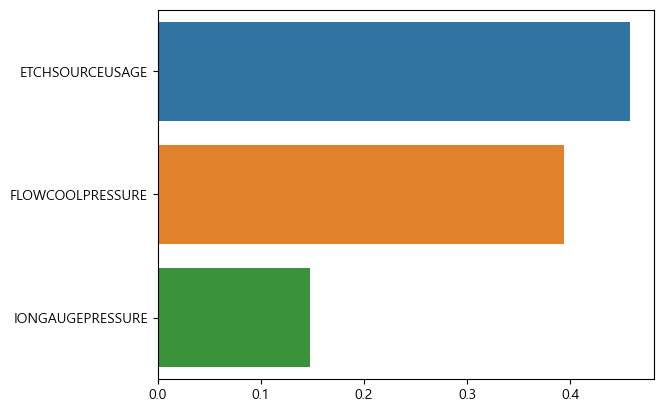

In [32]:
# 변수 중요도 시각화 #800000
temp = list(np.where(dt.feature_importances_>0)[0])
plot_y = list(X.columns[temp])

sns.barplot(x=dt.feature_importances_[dt.feature_importances_>0], y=plot_y)
plt.show()

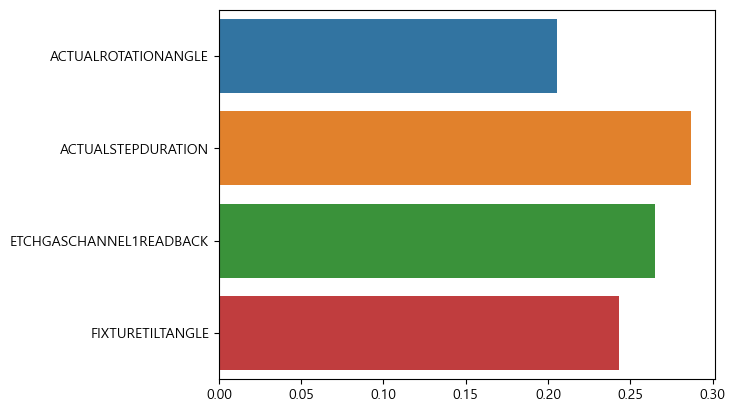

In [14]:
# 변수 중요도 시각화 #800000
temp = list(np.where(dt.feature_importances_>0)[0])
plot_y = list(X.columns[temp])

sns.barplot(x=dt.feature_importances_[dt.feature_importances_>0], y=plot_y)
plt.show()

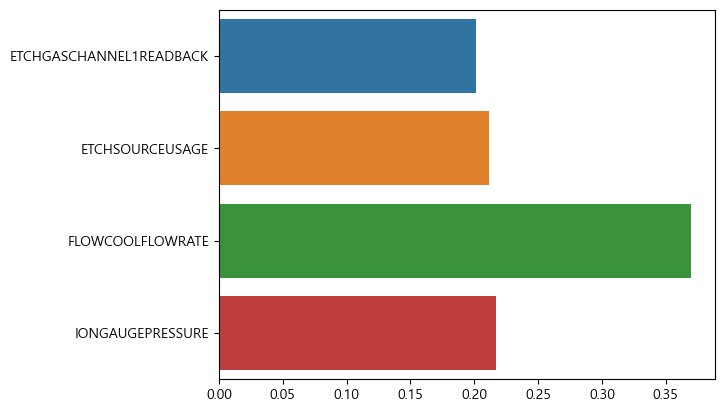

In [8]:
# 변수 중요도 시각화 #500000
temp = list(np.where(dt.feature_importances_>0)[0])
plot_y = list(X.columns[temp])

sns.barplot(x=dt.feature_importances_[dt.feature_importances_>0], y=plot_y)
plt.show()

In [ ]:
중요변수가 일관성 없이 계속 바뀜을 알 수 있음

In [12]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC:{roc_auc:4f}')

In [16]:
df_pb2 = df_pb.sample(1000000)
X = df_pb2.iloc[:, :-1]
y = df_pb2.iloc[:, -1]
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.5, random_state= None)

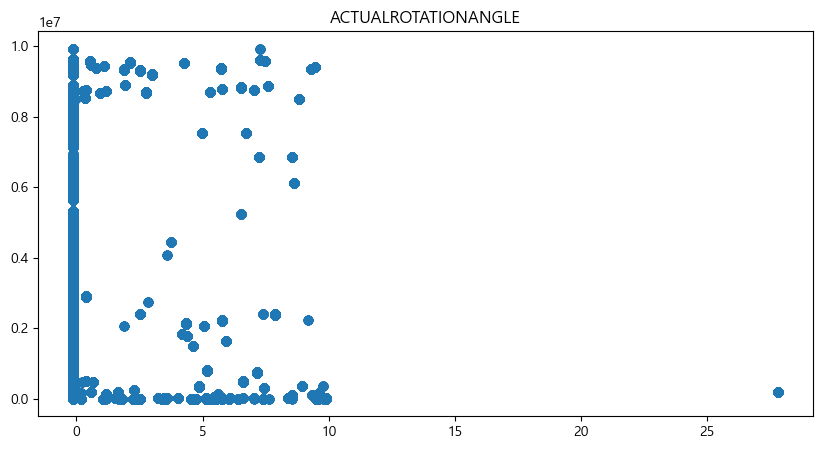

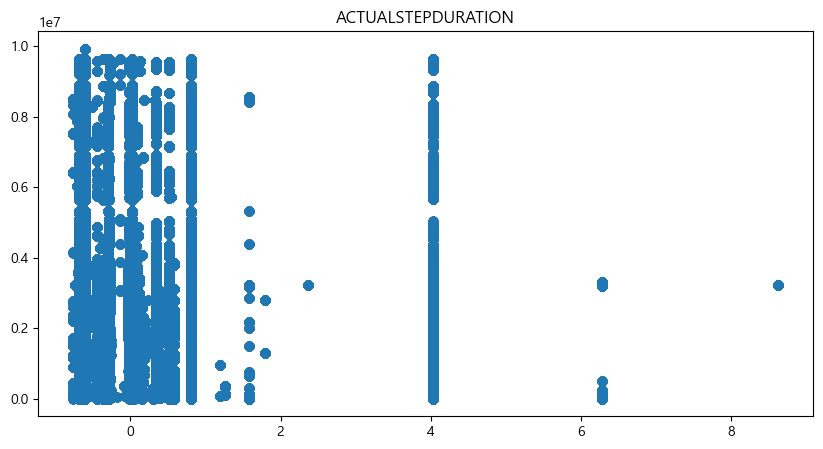

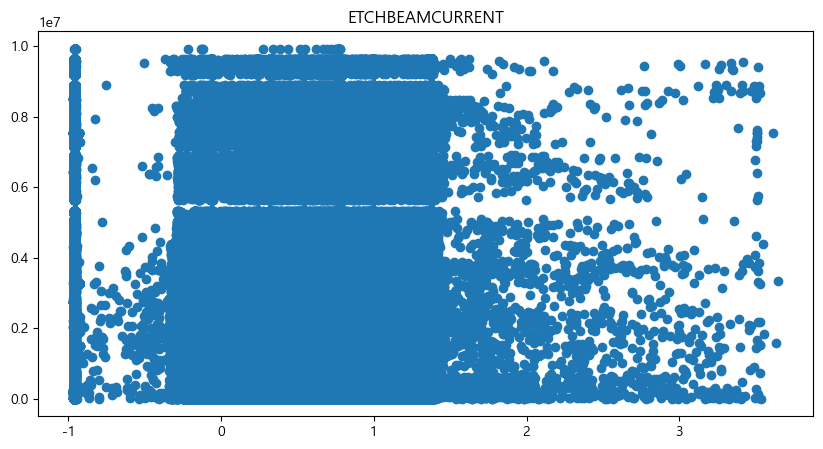

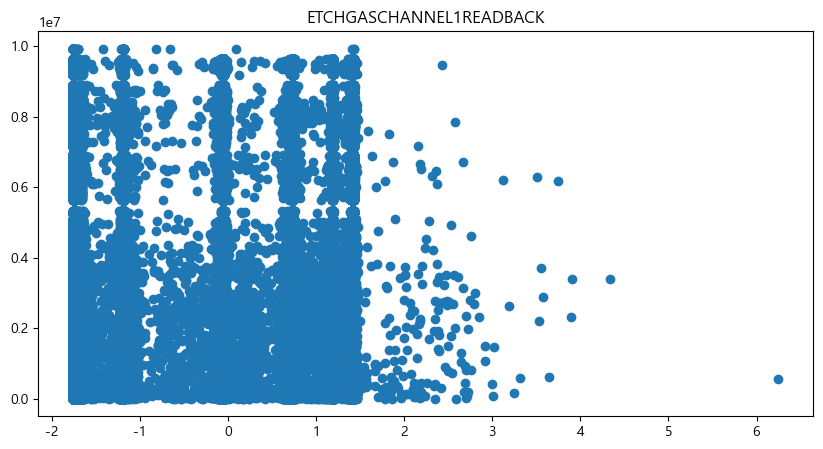

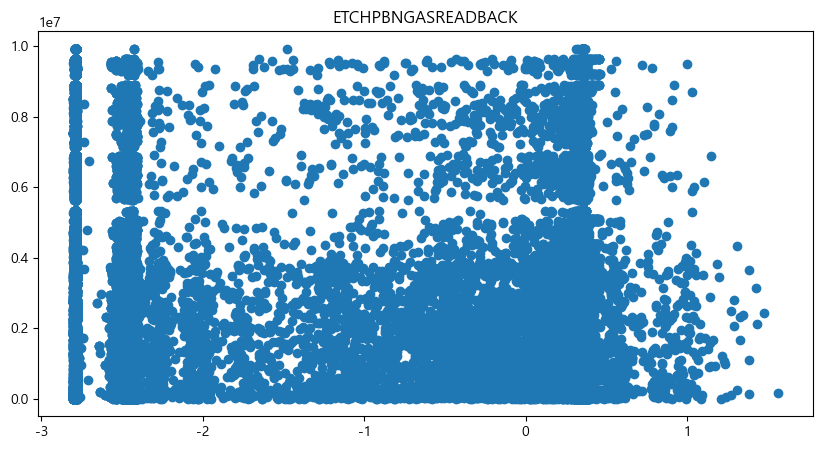

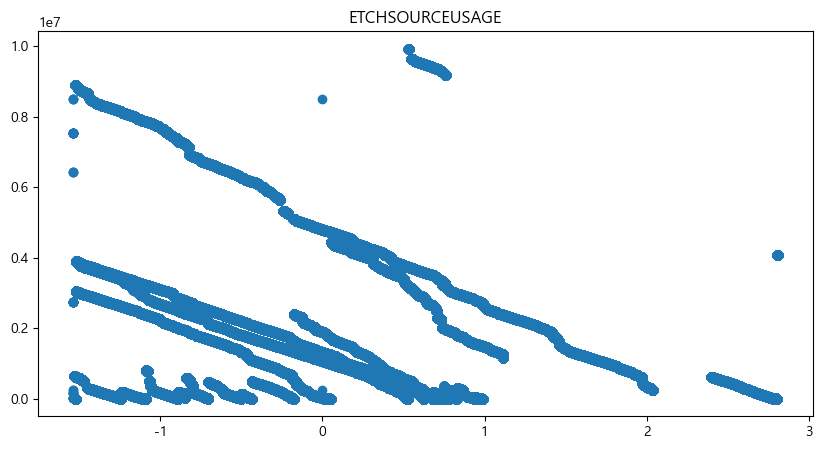

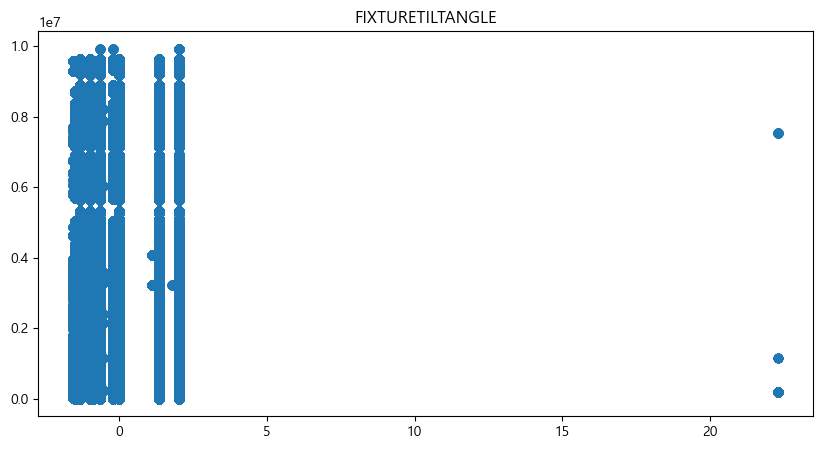

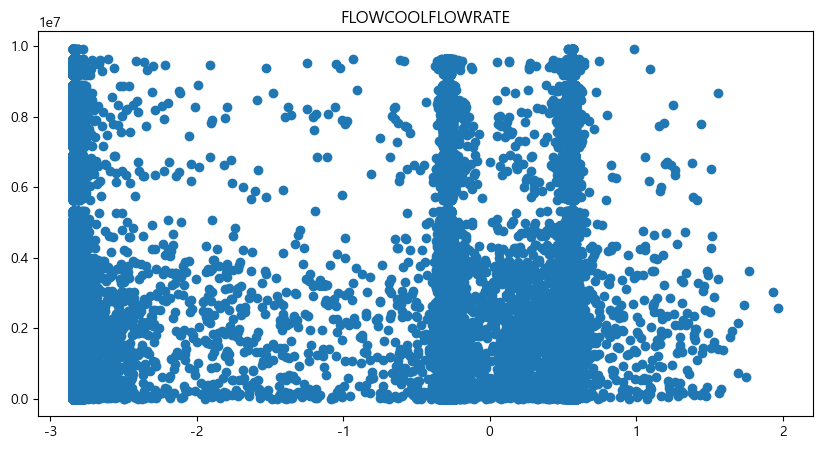

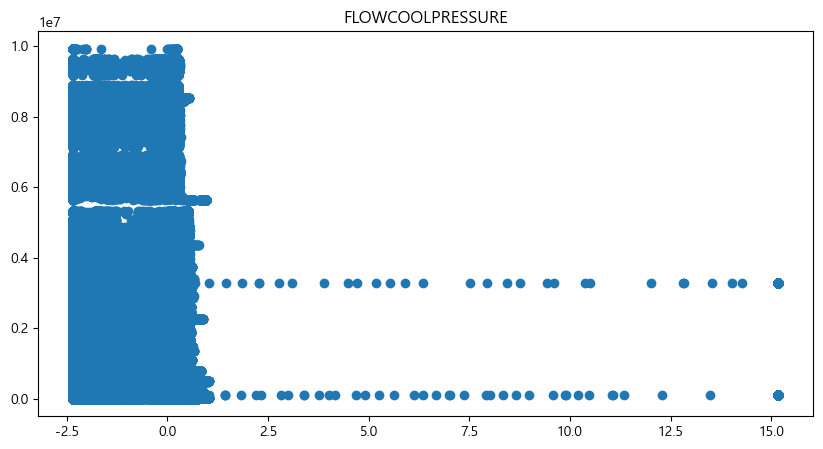

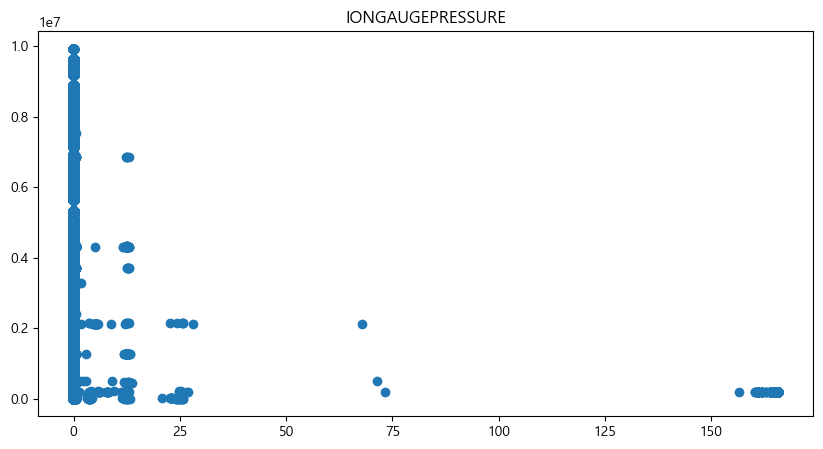

In [45]:
### 변수별 분포 확인
for val in col1:
    plt.figure(figsize=(10,5))
    plt.scatter(df_pb[val], df_pb.iloc[:, -1])
    plt.title(val)
    plt.show()

# XGB

In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [124]:
# 예제 데이터 생성
ss = StandardScaler()
    
ss.fit(df_pb.iloc[:, :-1])
X = ss.transform(df_pb.iloc[:, :-1])

ss.fit(df_pb.iloc[:, -1].values.reshape(-1, 1))
y = ss.transform(df_pb.iloc[:, -1].values.reshape(-1, 1))

idx = round(len(df_pb) * 0.8)

# 데이터를 훈련 세트와 테스트 세트로 분할
train_input, test_input = X[:idx], X[idx:]
train_target, test_target = y[:idx], y[idx:]

alpha_lis = [0.001, 0.01, 0.1, 1, 10]
for l_lis in alpha_lis:
    xgb_model = XGBRegressor(random_state=42, eval_metric='rmse', learning_rate=l_lis, objective='reg:squarederror', n_estimators=50000)
    xgb_model.fit(train_input, train_target, early_stopping_rounds=5, eval_set=[(test_input, test_target)])

    pred = xgb_model.predict(test_input)

    print('learning_rate : ', l_lis)
    ### 결정계수 및 과적합 여부 계산
    score = r2_adj()
    print('test : ', score)

    # 예측 결과 평가
    mse = mean_squared_error(test_target, pred)
    print("Mean Squared Error:", mse)
    
### .01가장 좋음

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.67257
[1]	validation_0-rmse:0.67234
[2]	validation_0-rmse:0.67212
[3]	validation_0-rmse:0.67189
[4]	validation_0-rmse:0.67167
[5]	validation_0-rmse:0.67145
[6]	validation_0-rmse:0.67123
[7]	validation_0-rmse:0.67101
[8]	validation_0-rmse:0.67079
[9]	validation_0-rmse:0.67057
[10]	validation_0-rmse:0.67036
[11]	validation_0-rmse:0.67014
[12]	validation_0-rmse:0.66993
[13]	validation_0-rmse:0.66972
[14]	validation_0-rmse:0.66951
[15]	validation_0-rmse:0.66930
[16]	validation_0-rmse:0.66909
[17]	validation_0-rmse:0.66889
[18]	validation_0-rmse:0.66868
[19]	validation_0-rmse:0.66848
[20]	validation_0-rmse:0.66828
[21]	validation_0-rmse:0.66807
[22]	validation_0-rmse:0.66787
[23]	validation_0-rmse:0.66766
[24]	validation_0-rmse:0.66747
[25]	validation_0-rmse:0.66726
[26]	validation_0-rmse:0.66707
[27]	validation_0-rmse:0.66686
[28]	validation_0-rmse:0.66668
[29]	validation_0-rmse:0.66648
[30]	validation_0-rmse:0.66629
[31]	validation_0-rmse:0.66609
[32]	validation_0-

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.67055
[1]	validation_0-rmse:0.66846
[2]	validation_0-rmse:0.66647
[3]	validation_0-rmse:0.66457
[4]	validation_0-rmse:0.66304
[5]	validation_0-rmse:0.66168
[6]	validation_0-rmse:0.66019
[7]	validation_0-rmse:0.65978
[8]	validation_0-rmse:0.65859
[9]	validation_0-rmse:0.65836
[10]	validation_0-rmse:0.65717
[11]	validation_0-rmse:0.65623
[12]	validation_0-rmse:0.65618
[13]	validation_0-rmse:0.65523
[14]	validation_0-rmse:0.65453
[15]	validation_0-rmse:0.65406
[16]	validation_0-rmse:0.65340
[17]	validation_0-rmse:0.65269
[18]	validation_0-rmse:0.65298
[19]	validation_0-rmse:0.65272
[20]	validation_0-rmse:0.65239
[21]	validation_0-rmse:0.65187
[22]	validation_0-rmse:0.65141
[23]	validation_0-rmse:0.65101
[24]	validation_0-rmse:0.65179
[25]	validation_0-rmse:0.65146
[26]	validation_0-rmse:0.65163
[27]	validation_0-rmse:0.65251
[28]	validation_0-rmse:0.65261
learning_rate :  0.01
test :  -0.47598314805100794
Mean Squared Error: 0.4238080259687658


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.65519
[1]	validation_0-rmse:0.65717
[2]	validation_0-rmse:0.65642
[3]	validation_0-rmse:0.65645
[4]	validation_0-rmse:0.67228
[5]	validation_0-rmse:0.68134
learning_rate :  0.1
test :  -0.4950088830751638
Mean Squared Error: 0.4292710010805343


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.94993
[1]	validation_0-rmse:0.95109
[2]	validation_0-rmse:0.96928
[3]	validation_0-rmse:1.00617
[4]	validation_0-rmse:1.00722
[5]	validation_0-rmse:0.99236
learning_rate :  1
test :  -2.1426771140121676
Mean Squared Error: 0.9023760099872674


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:8.56232
[1]	validation_0-rmse:69.89847
[2]	validation_0-rmse:635.94766
[3]	validation_0-rmse:5716.13846
[4]	validation_0-rmse:51448.14067
learning_rate :  10
test :  -254.32620921246894
Mean Squared Error: 73.31336868399327


In [100]:
# 예제 데이터 생성
ss = StandardScaler()
    
ss.fit(df_pb.iloc[:, :-1])
X = ss.transform(df_pb.iloc[:, :-1])

ss.fit(df_pb.iloc[:, -1].values.reshape(-1, 1))
y = ss.transform(df_pb.iloc[:, -1].values.reshape(-1, 1))

idx = round(len(df_pb) * 0.8)

# 데이터를 훈련 세트와 테스트 세트로 분할
train_input, test_input = X[:idx], X[idx:]
train_target, test_target = y[:idx], y[idx:]

xgb_model = XGBRegressor(random_state=None, eval_metric='rmse', learning_rate=0.01, objective='reg:squarederror', n_estimators=500, max_depth=3,
                         alpha=0.01)
xgb_model.fit(train_input, train_target, early_stopping_rounds=20, eval_set=[(test_input, test_target)])

pred = xgb_model.predict(test_input)

### 결정계수 및 과적합 여부 계산
score = r2_adj()
print('test : ', score)

# 예측 결과 평가
mse = mean_squared_error(test_target, pred)
print("Mean Squared Error:", mse)

[0]	validation_0-rmse:0.67139


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.67022
[2]	validation_0-rmse:0.66894
[3]	validation_0-rmse:0.66730
[4]	validation_0-rmse:0.66611
[5]	validation_0-rmse:0.66487
[6]	validation_0-rmse:0.66376
[7]	validation_0-rmse:0.66223
[8]	validation_0-rmse:0.66137
[9]	validation_0-rmse:0.65990
[10]	validation_0-rmse:0.65846
[11]	validation_0-rmse:0.65707
[12]	validation_0-rmse:0.65570
[13]	validation_0-rmse:0.65435
[14]	validation_0-rmse:0.65305
[15]	validation_0-rmse:0.65176
[16]	validation_0-rmse:0.65052
[17]	validation_0-rmse:0.64930
[18]	validation_0-rmse:0.64809
[19]	validation_0-rmse:0.64754
[20]	validation_0-rmse:0.64625
[21]	validation_0-rmse:0.64515
[22]	validation_0-rmse:0.64392
[23]	validation_0-rmse:0.64284
[24]	validation_0-rmse:0.64186
[25]	validation_0-rmse:0.64090
[26]	validation_0-rmse:0.63996
[27]	validation_0-rmse:0.63904
[28]	validation_0-rmse:0.63814
[29]	validation_0-rmse:0.63776
[30]	validation_0-rmse:0.63674
[31]	validation_0-rmse:0.63591
[32]	validation_0-rmse:0.63511
[33]	validation_0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


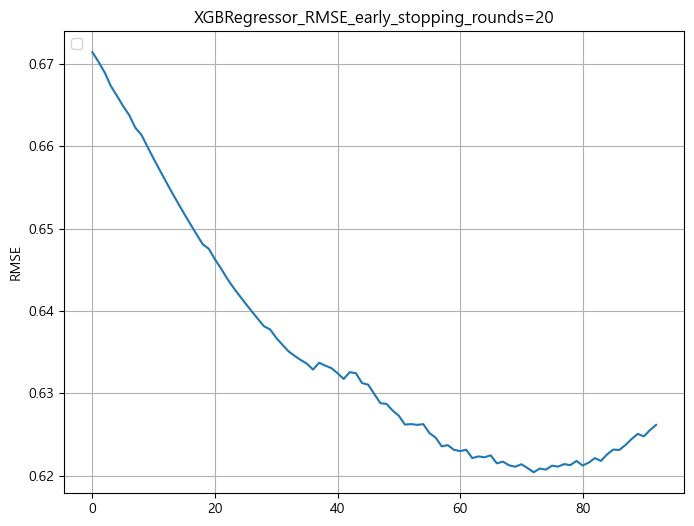

In [101]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(xgb_model.evals_result_['validation_0']['rmse'])), xgb_model.evals_result_['validation_0']['rmse'])
plt.ylabel('RMSE')
plt.title('XGBRegressor_RMSE_early_stopping_rounds=20')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [98]:
# 예제 데이터 생성
ss = StandardScaler()
    
ss.fit(df_pb.iloc[:, :-1])
X = ss.transform(df_pb.iloc[:, :-1])

ss.fit(df_pb.iloc[:, -1].values.reshape(-1, 1))
y = ss.transform(df_pb.iloc[:, -1].values.reshape(-1, 1))

idx = round(len(df_pb) * 0.8)

# 데이터를 훈련 세트와 테스트 세트로 분할
train_input, test_input = X[:idx], X[idx:]
train_target, test_target = y[:idx], y[idx:]

xgb_model = XGBRegressor(random_state=None, eval_metric='rmse', learning_rate=0.01, objective='reg:squarederror', n_estimators=500, max_depth=3,
                         alpha=0.01)
xgb_model.fit(train_input, train_target, early_stopping_rounds=5, eval_set=[(test_input, test_target)])

pred = xgb_model.predict(test_input)

### 결정계수 및 과적합 여부 계산
score = r2_adj()
print('test : ', score)

# 예측 결과 평가
mse = mean_squared_error(test_target, pred)
print("Mean Squared Error:", mse)

[0]	validation_0-rmse:0.67139


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.67022
[2]	validation_0-rmse:0.66894
[3]	validation_0-rmse:0.66730
[4]	validation_0-rmse:0.66611
[5]	validation_0-rmse:0.66487
[6]	validation_0-rmse:0.66376
[7]	validation_0-rmse:0.66223
[8]	validation_0-rmse:0.66137
[9]	validation_0-rmse:0.65990
[10]	validation_0-rmse:0.65846
[11]	validation_0-rmse:0.65707
[12]	validation_0-rmse:0.65570
[13]	validation_0-rmse:0.65435
[14]	validation_0-rmse:0.65305
[15]	validation_0-rmse:0.65176
[16]	validation_0-rmse:0.65052
[17]	validation_0-rmse:0.64930
[18]	validation_0-rmse:0.64809
[19]	validation_0-rmse:0.64754
[20]	validation_0-rmse:0.64625
[21]	validation_0-rmse:0.64515
[22]	validation_0-rmse:0.64392
[23]	validation_0-rmse:0.64284
[24]	validation_0-rmse:0.64186
[25]	validation_0-rmse:0.64090
[26]	validation_0-rmse:0.63996
[27]	validation_0-rmse:0.63904
[28]	validation_0-rmse:0.63814
[29]	validation_0-rmse:0.63776
[30]	validation_0-rmse:0.63674
[31]	validation_0-rmse:0.63591
[32]	validation_0-rmse:0.63511
[33]	validation_0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


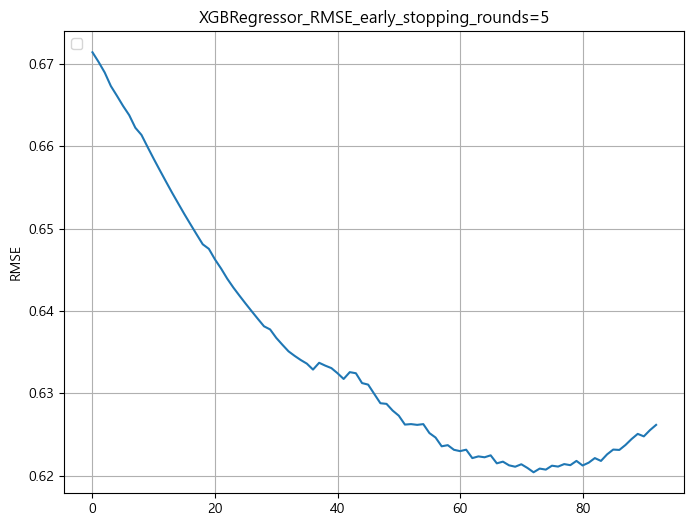

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(xgb_model.evals_result_['validation_0']['rmse'])), xgb_model.evals_result_['validation_0']['rmse'])
plt.ylabel('RMSE')
plt.title('XGBRegressor_RMSE_early_stopping_rounds=5')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [97]:
# 예제 데이터 생성
ss = StandardScaler()
    
ss.fit(df_pb.iloc[:, :-1])
X = ss.transform(df_pb.iloc[:, :-1])

ss.fit(df_pb.iloc[:, -1].values.reshape(-1, 1))
y = ss.transform(df_pb.iloc[:, -1].values.reshape(-1, 1))

idx = round(len(df_pb) * 0.8)

# 데이터를 훈련 세트와 테스트 세트로 분할
train_input, test_input = X[:idx], X[idx:]
train_target, test_target = y[:idx], y[idx:]

xgb_model = XGBRegressor(random_state=None, eval_metric='rmse', learning_rate=0.01, objective='reg:squarederror', n_estimators=72, max_depth=3,
                         )
xgb_model.fit(train_input, train_target)

pred = xgb_model.predict(test_input)

### 결정계수 및 과적합 여부 계산
score = r2_adj()
print('test : ', score)

# 예측 결과 평가
mse = mean_squared_error(test_target, pred)
print("Mean Squared Error:", mse)

test :  -0.342865931839353
Mean Squared Error: 0.38558839623623564


# LGBM

In [5]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
ss = StandardScaler()
    
ss.fit(df_pb.iloc[:, :-1])
X = ss.transform(df_pb.iloc[:, :-1])

ss.fit(df_pb.iloc[:, -1].values.reshape(-1, 1))
y = ss.transform(df_pb.iloc[:, -1].values.reshape(-1, 1))

idx = round(len(df_pb) * 0.8)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, y_train = X[:idx], X[idx:]
X_test, y_test = y[:idx], y[idx:]

# for l_rate in alpha_lis:
# LightGBM 회귀 모델 설정
params = {
    "objective": "regression",  # 회귀 타스크
    "metric": "mse",  # 평가 지표: 평균 제곱 오차 (Mean Squared Error)
    "boosting_type": "dart",  #gbdt #goss #rf
    "learning_rate": 0.001,  # 학습률
}

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=X_test)
test_data = lgb.Dataset(y_train, label=y_test, reference=train_data)

# 모델 훈련
num_round = 1000  # 라운드 수 (반복 횟수)
bst = lgb.train(params, train_data, num_boost_round = 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'])

# 예측
y_pred = bst.predict(y_train)

# 평가
mse = mean_squared_error(y_test, y_pred)
print('최적학습수 : ', bst.best_iteration)
print('score : ', bst.best_score)
print(f"Mean Squared Error (MSE): {mse}")

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] Start training from score 0.081369
최적학습수 :  0
score :  defaultdict(<class 'collections.OrderedDict'>, {'train': OrderedDict([('l2', 0.814357737896752)]), 'val': OrderedDict([('l2', 0.37825193785687644)])})
Mean Squared Error (MSE): 0.3782519378632707


In [54]:
ss = StandardScaler()

for df, name in zip([df_pb, df_ph, df_fl], ['df_pb', 'df_ph', 'df_fl']):
    for boos in ['goss', 'gbdt', 'dart', 'rf']:
        try:
            ss.fit(df.iloc[:, :-1])
            X = ss.transform(df.iloc[:, :-1])

            ss.fit(df.iloc[:, -1].values.reshape(-1, 1))
            y = ss.transform(df.iloc[:, -1].values.reshape(-1, 1))

            idx = round(len(df) * 0.8)

            # 데이터를 훈련 세트와 테스트 세트로 분할
            X_train, y_train = X[:idx], X[idx:]
            X_test, y_test = y[:idx], y[idx:]

            # for l_rate in alpha_lis:
            # LightGBM 회귀 모델 설정
            params = {
                "objective": "regression",  # 회귀 타스크
                "metric": "mse",  # 평가 지표: 평균 제곱 오차 (Mean Squared Error)
                "boosting_type": boos,
                "learning_rate": 0.01,  # 학습률
            }

            # LightGBM 데이터셋 생성
            train_data = lgb.Dataset(X_train, label=X_test)
            test_data = lgb.Dataset(y_train, label=y_test, reference=train_data)

            # 모델 훈련
            num_round = 1000  # 라운드 수 (반복 횟수)
            bst = lgb.train(params, train_data, num_boost_round = 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'])

            # early stopping 구현
            best_it = bst.best_iteration  # 최적의 반복 횟수 가져오기

            # 최적의 반복 횟수로 다시 모델 학습
            bst = lgb.train(params, train_data, num_boost_round = best_it)

            # 예측
            y_pred = bst.predict(X_test)

            # 평가
            mse = mean_squared_error(y_test, y_pred)
            print('최적학습수 : ', bst.best_iteration)
            print('score : ', bst.best_score)
            print(f"Mean Squared Error (MSE): {mse}")
            print('-'*100)
            
        except:
            print('ERROR_{}_{}'.format(name, boos))
            print('-'*100)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Start training from score 0.081369
ERROR_df_pb_goss
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] Start training from score 0.081369
ERROR_df_pb_gbdt
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] Start training from score 0.081369
ERROR_df_pb_dart
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


ERROR_df_pb_rf
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3009222, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Start training from score 0.144356
ERROR_df_ph_goss
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3009222, number of used features: 10
[LightGBM] [Info] Start training from score 0.144356
ERROR_df_ph_gbdt
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3009222, number of used features: 10
[LightGBM] [Info] Start training from score 0.144356
ERROR_df_ph_dart
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


ERROR_df_ph_rf
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 3696062, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Start training from score 0.147292
ERROR_df_fl_goss
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 3696062, number of used features: 10
[LightGBM] [Info] Start training from score 0.147292
ERROR_df_fl_gbdt
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 3696062, number of used features: 10
[LightGBM] [Info] Start training from score 0.147292
ERROR_df_fl_dart
----------------------------------------------------------------------------------------------------
ERROR_df_fl_rf
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


# LGBM 파라미터 튜닝

In [14]:
X_train.shape, y_train.shape

((3699445, 10), (924861, 10))

In [19]:
X_test.shape, y_test.shape

((3699445, 1), (924861, 1))

In [52]:
# 예제 데이터 생성
ss = StandardScaler()
    
ss.fit(df_pb.iloc[:, :-1])
X = ss.transform(df_pb.iloc[:, :-1])

ss.fit(df_pb.iloc[:, -1].values.reshape(-1, 1))
y = ss.transform(df_pb.iloc[:, -1].values.reshape(-1,1))
y = y.reshape(-1)

idx = round(len(df_pb) * 0.8)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

# LightGBM 회귀 모델 설정
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 모델 훈련
num_round = 1000  # 라운드 수 (반복 횟수)
bst = lgb.train(params, train_data, 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'], early_stopping_rounds=10, keep_training_booster=True)

y_pred = bst.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
print('최적학습수 : ', bst.best_iteration)
print('score : ', bst.best_score)
print(f"Mean Squared Error (MSE): {mse}")

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1526364, number of negative: 2173081
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412593 -> initscore=-0.353258
[LightGBM] [Info] Start training from score -0.353258
[1]	train's binary_logloss: 0.677274	val's binary_logloss: 0.648452
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.677055	val's binary_logloss: 0.648452
[3]	train's binary_logloss: 0.676872	val's binary_logloss: 0.648577
[4]	train's binary_logloss: 0.676471	val's binary_logloss: 0.648491
[5]	train's binary_logloss: 0.675498	val's binary_logloss: 0.648312
[6]	train's binary_logloss: 0.67

In [75]:
# 예제 데이터 생성
col2 = ['df_name', 'boost', 'iteration', 'train_binary_logloss', 'test_binary_logloss', 'mse']
temp = pd.DataFrame([np.zeros(len(col2))], columns=col2)
i = 0
ss = StandardScaler()

for df, name in zip([df_pb, df_ph, df_fl], ['df_pb', 'df_ph', 'df_fl']):
    for boos in ['goss', 'gbdt', 'dart']:
        try:
            ss.fit(df.iloc[:, :-1])
            X = ss.transform(df.iloc[:, :-1])

            ss.fit(df.iloc[:, -1].values.reshape(-1, 1))
            y = ss.transform(df.iloc[:, -1].values.reshape(-1, 1))

            idx = round(len(df) * 0.8)

            # 데이터를 훈련 세트와 테스트 세트로 분할
            X_train, X_test = X[:idx], X[idx:]
            y_train, y_test = y[:idx], y[idx:]

            # LightGBM 회귀 모델 설정
            params = {}
            params['learning_rate'] = 0.003
            params['boosting_type'] = boos
            params['objective'] = 'binary'
            params['metric'] = 'binary_logloss'
            params['sub_feature'] = 0.5
            params['num_leaves'] = 10
            params['min_data'] = 50
            params['max_depth'] = 10

            # LightGBM 데이터셋 생성
            train_data = lgb.Dataset(X_train, label=y_train)
            test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

            # 모델 훈련
            num_round = 1000  # 라운드 수 (반복 횟수)
            bst = lgb.train(params, train_data, 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'], early_stopping_rounds=10, keep_training_booster=True)

            # 평가
            y_pred = bst.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            score = bst.best_score
            
            temp.loc[i] = [name, boos, bst.best_iteration, score['train']['binary_logloss'], score['val']['binary_logloss'], mse]
            i += 1
            
        except:
            print('ERROR_{}_{}'.format(name, boos))
            print('-'*100)

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1526364, number of negative: 2173081
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412593 -> initscore=-0.353258
[LightGBM] [Info] Start training from score -0.353258
[1]	train's binary_logloss: 0.677274	val's binary_logloss: 0.648452
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.677055	val's binary_logloss: 0.648452
[3]	train's binary_logloss: 0.676872	val's binary_logloss: 0.648577
[4]	train's binary_logloss: 0.676471	val's binary_logloss: 0.648491
[5]	train's binary_logloss: 0.675498	val's binary_logloss: 0.648312
[6]

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1526364, number of negative: 2173081
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412593 -> initscore=-0.353258
[LightGBM] [Info] Start training from score -0.353258
[1]	train's binary_logloss: 0.677274	val's binary_logloss: 0.648452
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.677055	val's binary_logloss: 0.648452
[3]	train's binary_logloss: 0.676872	val's binary_logloss: 0.648577
[4]	train's binary_logloss: 0.676471	val's binary_logloss: 0.648491
[5]	train's binary_logloss: 0.675498	val's binary_logloss: 0.648312
[6]	train's binary_logloss: 0.67

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1526364, number of negative: 2173081
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412593 -> initscore=-0.353258
[LightGBM] [Info] Start training from score -0.353258
[1]	train's binary_logloss: 0.677274	val's binary_logloss: 0.648452
[2]	train's binary_logloss: 0.677055	val's binary_logloss: 0.648452


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[3]	train's binary_logloss: 0.676872	val's binary_logloss: 0.648577
[4]	train's binary_logloss: 0.676471	val's binary_logloss: 0.648491
[5]	train's binary_logloss: 0.675498	val's binary_logloss: 0.648312
[6]	train's binary_logloss: 0.675096	val's binary_logloss: 0.64826
[7]	train's binary_logloss: 0.674837	val's binary_logloss: 0.64807
[8]	train's binary_logloss: 0.674983	val's binary_logloss: 0.647996
[9]	train's binary_logloss: 0.674479	val's binary_logloss: 0.647975
[10]	train's binary_logloss: 0.673972	val's binary_logloss: 0.647927
[11]	train's binary_logloss: 0.673793	val's binary_logloss: 0.648051
[12]	train's binary_logloss: 0.674007	val's binary_logloss: 0.648074
[13]	train's binary_logloss: 0.673844	val's binary_logloss: 0.648115
[14]	train's binary_logloss: 0.672547	val's binary_logloss: 0.647513
[15]	train's binary_logloss: 0.671556	val's binary_logloss: 0.647354
[16]	train's binary_logloss: 0.671165	val's binary_logloss: 0.647271
[17]	train's binary_logloss: 0.669883	val's

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1526364, number of negative: 2173081
ERROR_df_pb_rf
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1803380, number of negative: 1205842
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3009222, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599284 -> initscore=0.402485
[LightGBM] [Info] Start training from score 0.402485
[1]	train's binary_logloss: 0.672067	val's binary_logloss: 0.826091
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.671881	val's binary_logloss: 0.825937
[3]	train's binary_logloss: 0.671339	val's binary_logloss: 0.826064
[4]	train's binary_logloss: 0.670231	val's binary_logloss: 0.826422
[5]	train's binary_logloss: 0.669511	val's binary_logloss: 0.824393
[6]	t

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1803380, number of negative: 1205842
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3009222, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599284 -> initscore=0.402485
[LightGBM] [Info] Start training from score 0.402485
[1]	train's binary_logloss: 0.672067	val's binary_logloss: 0.826091
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.671881	val's binary_logloss: 0.825937
[3]	train's binary_logloss: 0.671339	val's binary_logloss: 0.826064
[4]	train's binary_logloss: 0.670231	val's binary_logloss: 0.826422
[5]	train's binary_logloss: 0.669511	val's binary_logloss: 0.824393
[6]	train's binary_logloss: 0.6682

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1803380, number of negative: 1205842
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 3009222, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599284 -> initscore=0.402485
[LightGBM] [Info] Start training from score 0.402485
[1]	train's binary_logloss: 0.672067	val's binary_logloss: 0.826091


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[2]	train's binary_logloss: 0.671881	val's binary_logloss: 0.825937
[3]	train's binary_logloss: 0.671339	val's binary_logloss: 0.826064
[4]	train's binary_logloss: 0.670231	val's binary_logloss: 0.826422
[5]	train's binary_logloss: 0.669511	val's binary_logloss: 0.824393
[6]	train's binary_logloss: 0.668261	val's binary_logloss: 0.824855
[7]	train's binary_logloss: 0.667772	val's binary_logloss: 0.824931
[8]	train's binary_logloss: 0.668071	val's binary_logloss: 0.824856
[9]	train's binary_logloss: 0.666864	val's binary_logloss: 0.825354
[10]	train's binary_logloss: 0.665792	val's binary_logloss: 0.825771
[11]	train's binary_logloss: 0.665266	val's binary_logloss: 0.825898
[12]	train's binary_logloss: 0.665281	val's binary_logloss: 0.826702
[13]	train's binary_logloss: 0.665054	val's binary_logloss: 0.826693
[14]	train's binary_logloss: 0.663792	val's binary_logloss: 0.826887
[15]	train's binary_logloss: 0.662946	val's binary_logloss: 0.824881
[16]	train's binary_logloss: 0.661876	val'

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1803380, number of negative: 1205842
ERROR_df_ph_rf
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1879028, number of negative: 1817034
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 3696062, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508386 -> initscore=0.033549
[LightGBM] [Info] Start training from score 0.033549
[1]	train's binary_logloss: 0.692477	val's binary_logloss: 0.706153
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.69229	val's binary_logloss: 0.706536
[3]	train's binary_logloss: 0.69202	val's binary_logloss: 0.706344
[4]	train's binary_logloss: 0.691553	val's binary_logloss: 0.706765
[5]	train's binary_logloss: 0.690543	val's binary_logloss: 0.706475
[6]	tra

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1879028, number of negative: 1817034
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 3696062, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508386 -> initscore=0.033549
[LightGBM] [Info] Start training from score 0.033549
[1]	train's binary_logloss: 0.692477	val's binary_logloss: 0.706153
Training until validation scores don't improve for 10 rounds
[2]	train's binary_logloss: 0.69229	val's binary_logloss: 0.706536
[3]	train's binary_logloss: 0.69202	val's binary_logloss: 0.706344
[4]	train's binary_logloss: 0.691553	val's binary_logloss: 0.706765
[5]	train's binary_logloss: 0.690543	val's binary_logloss: 0.706475
[6]	train's binary_logloss: 0.690033

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Number of positive: 1879028, number of negative: 1817034
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 3696062, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508386 -> initscore=0.033549
[LightGBM] [Info] Start training from score 0.033549
[1]	train's binary_logloss: 0.692477	val's binary_logloss: 0.706153
[2]	train's binary_logloss: 0.69229	val's binary_logloss: 0.706536


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[3]	train's binary_logloss: 0.69202	val's binary_logloss: 0.706344
[4]	train's binary_logloss: 0.691553	val's binary_logloss: 0.706765
[5]	train's binary_logloss: 0.690543	val's binary_logloss: 0.706475
[6]	train's binary_logloss: 0.690033	val's binary_logloss: 0.706852
[7]	train's binary_logloss: 0.689735	val's binary_logloss: 0.707042
[8]	train's binary_logloss: 0.689872	val's binary_logloss: 0.706868
[9]	train's binary_logloss: 0.689364	val's binary_logloss: 0.707145
[10]	train's binary_logloss: 0.688863	val's binary_logloss: 0.707539
[11]	train's binary_logloss: 0.688598	val's binary_logloss: 0.707349
[12]	train's binary_logloss: 0.68885	val's binary_logloss: 0.707605
[13]	train's binary_logloss: 0.688702	val's binary_logloss: 0.707551
[14]	train's binary_logloss: 0.687406	val's binary_logloss: 0.707813
[15]	train's binary_logloss: 0.686324	val's binary_logloss: 0.707444
[16]	train's binary_logloss: 0.685865	val's binary_logloss: 0.707862
[17]	train's binary_logloss: 0.684536	val's

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1879028, number of negative: 1817034
ERROR_df_fl_rf
----------------------------------------------------------------------------------------------------


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


In [105]:
temp['train_binary_logloss'] = 0
temp['test_binary_logloss'] = 0
i = 0
for val in temp['score']:
    temp['train_binary_logloss'][i] = val['train']['binary_logloss']
    temp['test_binary_logloss'][i] = val['val']['binary_logloss']
    i += 1
temp

C:\Users\USER\AppData\Local\Temp\ipykernel_20616\2905492486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['train_binary_logloss'][i] = val['train']['binary_logloss']
C:\Users\USER\AppData\Local\Temp\ipykernel_20616\2905492486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['test_binary_logloss'][i] = val['val']['binary_logloss']


,df_name,boost,iteration,score,mse,train_score,train_binary_logloss,test_binary_logloss
0,df_pb,goss,206.0,{'train': {'binary_logloss': 0.567241990161449...,0.807734,0,0.567242,0.617411
1,df_pb,gbdt,206.0,{'train': {'binary_logloss': 0.567241990161449...,0.807734,0,0.567242,0.617411
2,df_pb,dart,0.0,{'train': {'binary_logloss': 0.527413819891365...,0.853073,0,0.527414,0.616233
3,df_ph,goss,5.0,{'train': {'binary_logloss': 0.669510545998045...,1.726097,0,0.669511,0.824393
4,df_ph,gbdt,5.0,{'train': {'binary_logloss': 0.669510545998045...,1.726097,0,0.669511,0.824393
5,df_ph,dart,0.0,{'train': {'binary_logloss': 0.505059025987011...,1.599077,0,0.505059,0.721755
6,df_fl,goss,1.0,{'train': {'binary_logloss': 0.692477109215892...,1.445833,0,0.692477,0.706153
7,df_fl,gbdt,1.0,{'train': {'binary_logloss': 0.692477109215892...,1.445833,0,0.692477,0.706153
8,df_fl,dart,0.0,{'train': {'binary_logloss': 0.531370382725039...,1.554162,0,0.531370,0.745517


## 파라미터 튜닝

In [214]:
### 튜닝을 위한 함수
def lgbm_model(lis, params, val_name):
    col2 = ['df_name', 'tuning', 'iteration', 'train_binary_logloss', 'test_binary_logloss', 'train_auc', 'test_auc', 'mse']
    temp = pd.DataFrame([np.zeros(len(col2))], columns=col2)
    i = 0
    ss = StandardScaler()

    for df, name in zip([df_pb, df_ph, df_fl], ['df_pb', 'df_ph', 'df_fl']):
        for boos in lis:
            try:
                ss.fit(df.iloc[:, :-1])
                X = ss.transform(df.iloc[:, :-1])

                ss.fit(df.iloc[:, -1].values.reshape(-1, 1))
                y = ss.transform(df.iloc[:, -1].values.reshape(-1, 1))

                idx = round(len(df) * 0.8)

                # 데이터를 훈련 세트와 테스트 세트로 분할
                X_train, X_test = X[:idx], X[idx:]
                y_train, y_test = y[:idx], y[idx:]

                # LightGBM 데이터셋 생성
                train_data = lgb.Dataset(X_train, label=y_train)
                test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
                
                params[val_name] = boos

                # 모델 훈련
                bst = lgb.train(params, train_data, 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'], early_stopping_rounds=10, keep_training_booster=True,
                                verbose_eval=0)

                # 평가
                y_pred = bst.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                score = bst.best_score
                
                temp.loc[i] = [name, boos, bst.best_iteration, score['train']['binary_logloss'], score['val']['binary_logloss'], score['train']['auc'], score['val']['auc'], mse]
                i += 1
                
                clear_output(wait=True)
                print(bst.params)
            except:
                print('ERROR_{}_{}'.format(name, boos))
                print('-'*100)
                break
            
    return(temp)

### 튜닝을 위한 함수
def lgbm_model2(lis, params, val_name):
    col2 = ['df_name', 'tuning', 'iteration', 'train_binary_logloss', 'test_binary_logloss', 'train_auc', 'test_auc', 'mse']
    temp = pd.DataFrame([np.zeros(len(col2))], columns=col2)
    i = 0
    ss = StandardScaler()

    for df, name, val_lis in zip([df_pb, df_ph, df_fl], ['df_pb', 'df_ph', 'df_fl'], lis):
        for boos in val_lis:
            try:
                ss.fit(df.iloc[:, :-1])
                X = ss.transform(df.iloc[:, :-1])

                ss.fit(df.iloc[:, -1].values.reshape(-1, 1))
                y = ss.transform(df.iloc[:, -1].values.reshape(-1, 1))

                idx = round(len(df) * 0.8)

                # 데이터를 훈련 세트와 테스트 세트로 분할
                X_train, X_test = X[:idx], X[idx:]
                y_train, y_test = y[:idx], y[idx:]

                # LightGBM 데이터셋 생성
                train_data = lgb.Dataset(X_train, label=y_train)
                test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
                
                params[val_name] = boos

                # 모델 훈련
                bst = lgb.train(params, train_data, 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'], early_stopping_rounds=10, keep_training_booster=True,
                                verbose_eval=0)

                # 평가
                y_pred = bst.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                score = bst.best_score
                
                temp.loc[i] = [name, boos, bst.best_iteration, score['train']['binary_logloss'], score['val']['binary_logloss'], score['train']['auc'], score['val']['auc'], mse]
                i += 1
                
                clear_output(wait=True)
                print(bst.params)
            except:
                print('ERROR_{}_{}'.format(name, boos))
                print('-'*100)
                break
            
    return(temp)

In [215]:
lis = [0.003, 0.05, 0.1, 1]
params = {'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42}

lgbm_model(lis, params, 'learning_rate')

## ∴ learning_rate : 0.1

{'boosting_type': 'gbdt', 'objective': 'binary', 'metric': ['auc', 'binary_logloss'], 'random_state': 42, 'learning_rate': 1, 'num_iterations': 1000, 'early_stopping_round': 10}


,df_name,tuning,iteration,train_binary_logloss,test_binary_logloss,train_auc,test_auc,mse
0,df_pb,0.003,3.0,0.671546,0.645804,0.961585,0.750202,0.830604
1,df_pb,0.050,2.0,0.612429,0.621876,0.963117,0.748417,0.818925
2,df_pb,0.100,2.0,0.554964,0.601912,0.966223,0.745157,0.811792
3,df_pb,1.000,1.0,0.298792,0.638067,0.957662,0.736445,0.853774
4,df_ph,0.003,7.0,0.660409,0.825395,0.939045,0.514070,1.728092
5,df_ph,0.050,1.0,0.642759,0.825510,0.939045,0.514070,1.729515
6,df_ph,0.100,1.0,0.613789,0.827173,0.939045,0.514070,1.732091
7,df_ph,1.000,1.0,0.333069,1.122811,0.939045,0.514070,1.823872
8,df_fl,0.003,1.0,0.690999,0.706182,0.951707,0.711673,1.446274
9,df_fl,0.050,1.0,0.660342,0.711892,0.951707,0.711673,1.460329


In [216]:
lis = [10, 50, 100]
params = {'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42,
        'learning_rate': 0.1}

lgbm_model(lis, params, 'max_depth')

## ∴ max_depth : 10

{'boosting_type': 'gbdt', 'objective': 'binary', 'metric': ['auc', 'binary_logloss'], 'random_state': 42, 'learning_rate': 0.1, 'max_depth': 100, 'num_iterations': 1000, 'early_stopping_round': 10}


,df_name,tuning,iteration,train_binary_logloss,test_binary_logloss,train_auc,test_auc,mse
0,df_pb,10.0,2.0,0.554964,0.601912,0.966223,0.745157,0.811792
1,df_pb,50.0,2.0,0.554964,0.601912,0.966223,0.745157,0.811792
2,df_pb,100.0,2.0,0.554964,0.601912,0.966223,0.745157,0.811792
3,df_ph,10.0,1.0,0.613789,0.827173,0.939045,0.514070,1.732091
4,df_ph,50.0,1.0,0.613789,0.827173,0.939045,0.514070,1.732091
5,df_ph,100.0,1.0,0.613789,0.827173,0.939045,0.514070,1.732091
6,df_fl,10.0,1.0,0.629349,0.719461,0.951707,0.711673,1.475927
7,df_fl,50.0,1.0,0.629349,0.719461,0.951707,0.711673,1.475927
8,df_fl,100.0,1.0,0.629349,0.719461,0.951707,0.711673,1.475927


In [242]:
lis = []
for df in [df_pb, df_ph, df_fl]:
    a = round(len(df) * 0.08)
    b = round(len(df) * 0.06)
    c = round(len(df) * 0.04)
    lis.append([a, b, c])
    
col2 = ['df_name', 'tuning', 'iteration', 'train_binary_logloss', 'test_binary_logloss', 'train_auc', 'test_auc', 'mse']
params = {'learning_rate': 0.1,
        'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42,
        'max_depth' : 10}

lgbm_model2(lis, params, 'min_data')

## ∴ min_data : [369944, 300922, 369606] #0.8

{'learning_rate': 0.1, 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': ['auc', 'binary_logloss'], 'random_state': 42, 'max_depth': 10, 'min_data': 184803, 'num_iterations': 1000, 'early_stopping_round': 10}


,df_name,tuning,iteration,train_binary_logloss,test_binary_logloss,train_auc,test_auc,mse
0,df_pb,369944.0,19.0,0.442460,0.546714,0.911434,0.768196,0.818482
1,df_pb,277458.0,12.0,0.458575,0.575864,0.916161,0.752808,0.840427
2,df_pb,184972.0,37.0,0.267988,0.579667,0.969793,0.742187,0.798660
3,df_ph,300922.0,1.0,0.637413,0.838191,0.851872,0.519428,1.744317
4,df_ph,225692.0,1.0,0.635715,0.840678,0.860150,0.494851,1.747119
5,df_ph,150461.0,1.0,0.632754,0.841098,0.877824,0.480298,1.747182
6,df_fl,369606.0,1.0,0.662083,0.719422,0.821024,0.582923,1.473841
7,df_fl,277205.0,1.0,0.660940,0.719312,0.827719,0.565315,1.473698
8,df_fl,184803.0,1.0,0.651251,0.721811,0.877512,0.257816,1.465752


In [246]:
def lgbm_model3(lis, params, val_name):
    col2 = ['df_name', 'tuning', 'iteration', 'train_binary_logloss', 'test_binary_logloss', 'train_auc', 'test_auc', 'mse']
    temp = pd.DataFrame([np.zeros(len(col2))], columns=col2)
    i = 0
    ss = StandardScaler()

    for df, name, min_lis, min_leaf_lis in zip([df_pb, df_ph, df_fl], ['df_pb', 'df_ph', 'df_fl'], [369944, 300922, 369606], lis):
        for boos in min_leaf_lis:
            try:
                ss.fit(df.iloc[:, :-1])
                X = ss.transform(df.iloc[:, :-1])

                ss.fit(df.iloc[:, -1].values.reshape(-1, 1))
                y = ss.transform(df.iloc[:, -1].values.reshape(-1, 1))

                idx = round(len(df) * 0.8)

                # 데이터를 훈련 세트와 테스트 세트로 분할
                X_train, X_test = X[:idx], X[idx:]
                y_train, y_test = y[:idx], y[idx:]

                # LightGBM 데이터셋 생성
                train_data = lgb.Dataset(X_train, label=y_train)
                test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
                
                params['min_data'] = min_lis
                params[val_name] = boos

                # 모델 훈련
                bst = lgb.train(params, train_data, 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'], early_stopping_rounds=10, keep_training_booster=True,
                                verbose_eval=0)

                # 평가
                y_pred = bst.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                score = bst.best_score
                
                temp.loc[i] = [name, boos, bst.best_iteration, score['train']['binary_logloss'], score['val']['binary_logloss'], score['train']['auc'], score['val']['auc'], mse]
                i += 1
                
                clear_output(wait=True)
                
                print(bst.params[val_name])
            except:
                print('ERROR_{}_{}'.format(name, boos))
                print('-'*100)
                break
            
    return(temp)

In [247]:
lis = []
for df in [df_pb, df_ph, df_fl]:
    a = round(len(df) * 0.05)
    b = round(len(df) * 0.03)
    c = round(len(df) * 0.01)
    lis.append([a, b, c])
    
col2 = ['df_name', 'tuning', 'iteration', 'train_binary_logloss', 'test_binary_logloss', 'train_auc', 'test_auc', 'mse']
params = {'learning_rate': 0.1,
        'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42,
        'max_depth' : 10}

lgbm_model3(lis, params, 'min_data_in_leaf')

## ∴ min_data_in_leaf : [138729, 112846, 138602] #0.3

46201


,df_name,tuning,iteration,train_binary_logloss,test_binary_logloss,train_auc,test_auc,mse
0,df_pb,231215.0,3.0,0.583968,0.613294,0.878798,0.725741,0.838648
1,df_pb,138729.0,23.0,0.307753,0.587348,0.962652,0.731356,0.832419
2,df_pb,46243.0,2.0,0.562195,0.614893,0.960200,0.707085,0.822993
3,df_ph,188076.0,1.0,0.634250,0.839427,0.870237,0.482228,1.744613
4,df_ph,112846.0,1.0,0.627988,0.839701,0.896902,0.481843,1.744706
5,df_ph,37615.0,1.0,0.618946,0.837533,0.929156,0.529096,1.745615
6,df_fl,231004.0,1.0,0.656122,0.720214,0.855092,0.427436,1.466749
7,df_fl,138602.0,1.0,0.645507,0.707754,0.902878,0.734847,1.463856
8,df_fl,46201.0,1.0,0.632857,0.719338,0.944906,0.746811,1.480208


In [248]:
def lgbm_model4(lis, params, val_name):
    col2 = ['df_name', 'tuning', 'iteration', 'train_binary_logloss', 'test_binary_logloss', 'train_auc', 'test_auc', 'mse']
    temp = pd.DataFrame([np.zeros(len(col2))], columns=col2)
    i = 0
    ss = StandardScaler()

    for df, name, min_lis, min_leaf_lis in zip([df_pb, df_ph, df_fl], ['df_pb', 'df_ph', 'df_fl'], [369944, 300922, 369606], [138729, 112846, 138602]):
        for boos in lis:
            try:
                ss.fit(df.iloc[:, :-1])
                X = ss.transform(df.iloc[:, :-1])

                ss.fit(df.iloc[:, -1].values.reshape(-1, 1))
                y = ss.transform(df.iloc[:, -1].values.reshape(-1, 1))

                idx = round(len(df) * 0.8)

                # 데이터를 훈련 세트와 테스트 세트로 분할
                X_train, X_test = X[:idx], X[idx:]
                y_train, y_test = y[:idx], y[idx:]

                # LightGBM 데이터셋 생성
                train_data = lgb.Dataset(X_train, label=y_train)
                test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
                
                params['min_data'] = min_lis
                params['min_data_in_leaf'] = min_leaf_lis
                params[val_name] = boos

                # 모델 훈련
                bst = lgb.train(params, train_data, 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'], early_stopping_rounds=10, keep_training_booster=True,
                                verbose_eval=0)

                # 평가
                y_pred = bst.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                score = bst.best_score
                
                temp.loc[i] = [name, boos, bst.best_iteration, score['train']['binary_logloss'], score['val']['binary_logloss'], score['train']['auc'], score['val']['auc'], mse]
                i += 1
                
                clear_output(wait=True)
                
                print(bst.params[val_name])
            except:
                print('ERROR_{}_{}'.format(name, boos))
                print('-'*100)
                break
            
    return(temp)

In [250]:
lis = [2, 4, 8, 16]
        
params = {'learning_rate': 0.1,
        'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42,
        'max_depth' : 10,
        # min_data : [231215, 188076, 231004]
        # min_data_in_leaf : [138729, 112846, 138602]
         }

lgbm_model4(lis, params, 'num_leaves')

## ∴ num_leaves : 16

16


,df_name,tuning,iteration,train_binary_logloss,test_binary_logloss,train_auc,test_auc,mse
0,df_pb,2.0,13.0,0.612743,0.574773,0.708607,0.873381,0.803746
1,df_pb,4.0,10.0,0.560240,0.549602,0.820516,0.805985,0.815023
2,df_pb,8.0,16.0,0.423583,0.581887,0.927114,0.734231,0.856454
3,df_pb,16.0,20.0,0.328499,0.590184,0.956610,0.729033,0.842379
4,df_ph,2.0,1.0,0.664137,0.834817,0.657105,0.501005,1.739459
5,df_ph,4.0,1.0,0.651965,0.839011,0.743225,0.507513,1.745177
6,df_ph,8.0,1.0,0.635857,0.840694,0.857123,0.510075,1.747341
7,df_ph,16.0,1.0,0.628213,0.839245,0.890566,0.500160,1.744589
8,df_fl,2.0,1.0,0.680132,0.702438,0.682919,0.581458,1.453143
9,df_fl,4.0,1.0,0.667654,0.713047,0.775202,0.585923,1.468019


In [254]:
lis = [0.5, 0.7, 0.9, 1]
        
params = {'learning_rate': 0.1,
        'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42,
        'max_depth' : 10,
        'num_leaves' : 16
        # min_data : [231215, 188076, 231004]
        # min_data_in_leaf : [138729, 112846, 138602]
         }

lgbm_model4(lis, params, 'sub_feature')

## ∴ sub_feature : 0.9

1


,df_name,tuning,iteration,train_binary_logloss,test_binary_logloss,train_auc,test_auc,mse
0,df_pb,0.5,15.0,0.406138,0.581054,0.948517,0.718947,0.801973
1,df_pb,0.7,23.0,0.329716,0.596128,0.961442,0.715848,0.812682
2,df_pb,0.9,31.0,0.279740,0.593286,0.968233,0.726216,0.793451
3,df_pb,1.0,20.0,0.328499,0.590184,0.956610,0.729033,0.842379
4,df_ph,0.5,1.0,0.637815,0.840143,0.851804,0.517727,1.746691
5,df_ph,0.7,1.0,0.636333,0.838918,0.861168,0.519160,1.744560
6,df_ph,0.9,1.0,0.628213,0.839245,0.890566,0.500160,1.744589
7,df_ph,1.0,1.0,0.628213,0.839245,0.890566,0.500160,1.744589
8,df_fl,0.5,1.0,0.674969,0.726989,0.735353,0.506504,1.474839
9,df_fl,0.7,1.0,0.675750,0.719737,0.730006,0.563316,1.465683


In [255]:
lis = [0.5, 0.7, 0.9, 1]
        
params = {'learning_rate': 0.1,
        'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42,
        'max_depth' : 10,
        'num_leaves' : 16,
        'sub_feature' : 0.9
        # min_data : [231215, 188076, 231004]
        # min_data_in_leaf : [138729, 112846, 138602]
         }

lgbm_model4(lis, params, 'feature_fraction')

## ∴ feature_fraction : 0.

1


,df_name,tuning,iteration,train_binary_logloss,test_binary_logloss,train_auc,test_auc,mse
0,df_pb,0.5,15.0,0.406138,0.581054,0.948517,0.718947,0.801973
1,df_pb,0.7,23.0,0.329716,0.596128,0.961442,0.715848,0.812682
2,df_pb,0.9,31.0,0.279740,0.593286,0.968233,0.726216,0.793451
3,df_pb,1.0,20.0,0.328499,0.590184,0.956610,0.729033,0.842379
4,df_ph,0.5,1.0,0.637815,0.840143,0.851804,0.517727,1.746691
5,df_ph,0.7,1.0,0.636333,0.838918,0.861168,0.519160,1.744560
6,df_ph,0.9,1.0,0.628213,0.839245,0.890566,0.500160,1.744589
7,df_ph,1.0,1.0,0.628213,0.839245,0.890566,0.500160,1.744589
8,df_fl,0.5,1.0,0.674969,0.726989,0.735353,0.506504,1.474839
9,df_fl,0.7,1.0,0.675750,0.719737,0.730006,0.563316,1.465683


# predict 및 시각화

In [279]:
ss = StandardScaler()

ss.fit(df_pb.iloc[:, :-1])
X = ss.transform(df_pb.iloc[:, :-1])

ss.fit(df_pb.iloc[:, -1].values.reshape(-1, 1))
y = ss.transform(df_pb.iloc[:, -1].values.reshape(-1, 1))

idx = round(len(df_pb) * 0.8)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {'learning_rate': 0.1,
        'boosting_type' : 'gbdt',
        'objective':'binary',
        'metric' : ['auc', 'binary_logloss'],
        'random_state': 42,
        'max_depth' : 10,
        'num_leaves' : 16,
        'sub_feature' : 0.9
        # min_data : [231215, 188076, 231004]
        # min_data_in_leaf : [138729, 112846, 138602]
        }

params['min_data'] = 369944
params['min_data_in_leaf'] = 138729

# 모델 훈련
bst = lgb.train(params, train_data, 1000, valid_sets=[train_data, test_data], valid_names=['train', 'val'], early_stopping_rounds=10, keep_training_booster=True,
                verbose_eval=0)

# 평가
y_pred = bst.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = bst.best_score

[LightGBM] [Warning] min_data_in_leaf is set=138729, min_data=369944 will be ignored. Current value: min_data_in_leaf=138729
[LightGBM] [Warning] min_data_in_leaf is set=138729, min_data=369944 will be ignored. Current value: min_data_in_leaf=138729
[LightGBM] [Info] Number of positive: 1526364, number of negative: 2173081
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 3699445, number of used features: 10
[LightGBM] [Warning] min_data_in_leaf is set=138729, min_data=369944 will be ignored. Current value: min_data_in_leaf=138729
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412593 -> initscore=-0.353258
[LightGBM] [Info] Start training from score -0.353258


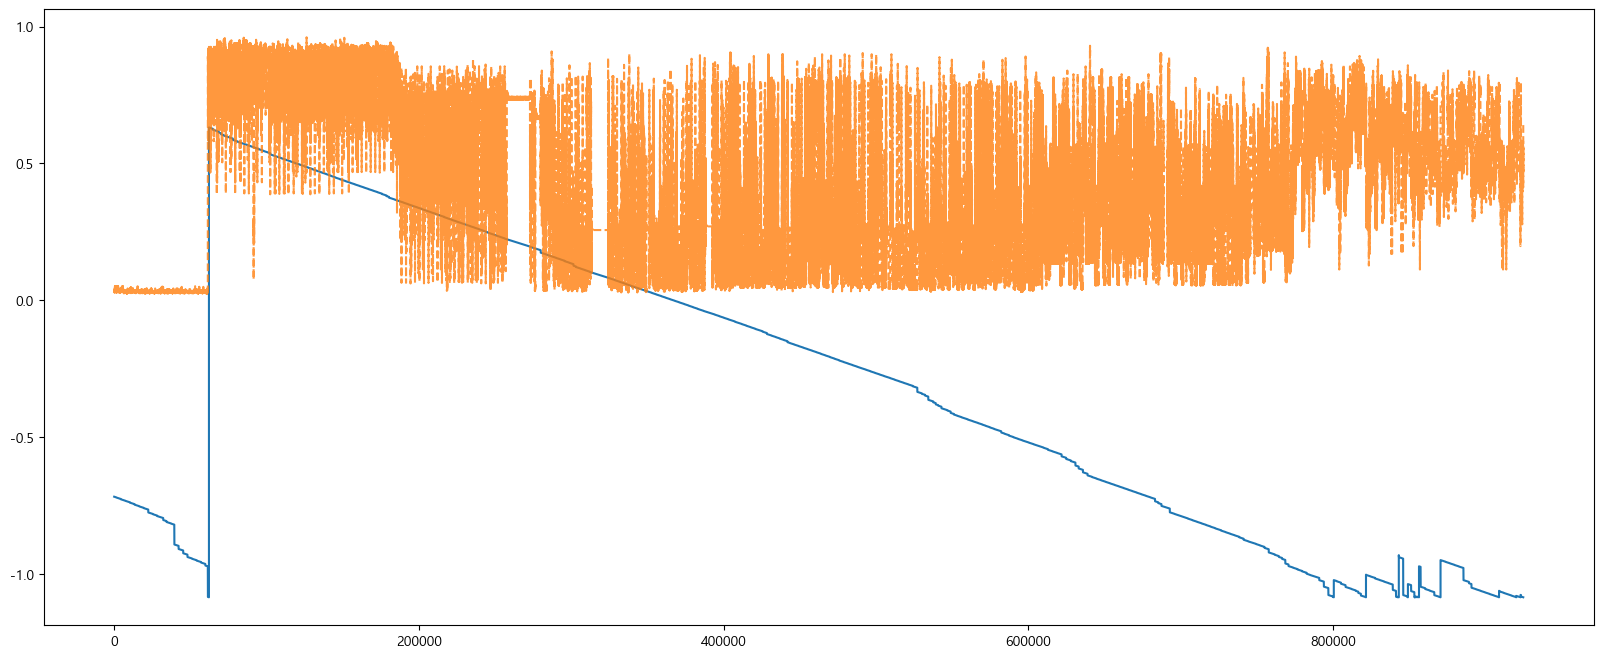

In [280]:
plt.figure(figsize=(20,8))
plt.plot(range(len(y_test)), y_test.reshape(-1))
plt.plot(range(len(y_test)), y_pred, linestyle='--', alpha=0.8)
plt.show()

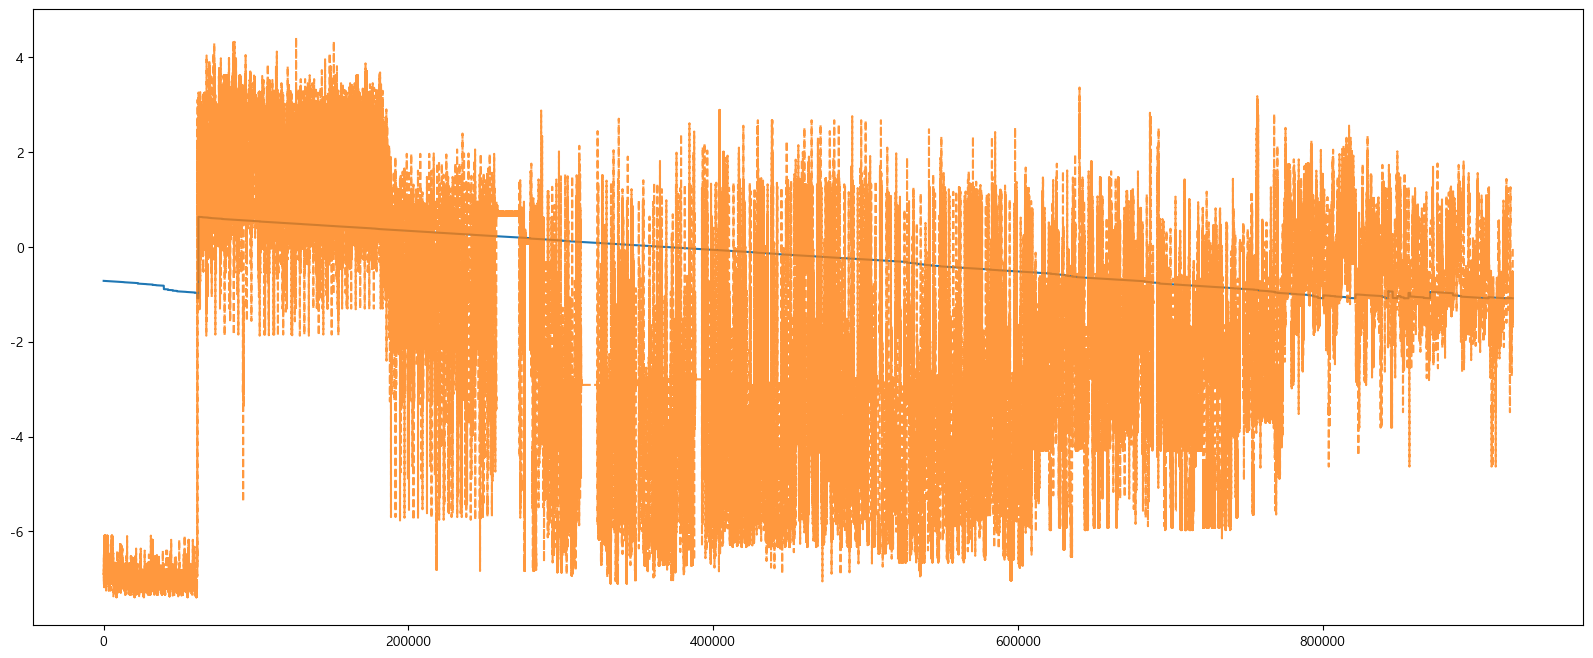

In [296]:
max_val = y_test.max()
min_val = y_test.min()

pred_reverse = []
for val in y_pred:
    P = -np.log(1 / val - 1)
    pred_reverse.append(min_val + P * (max_val - min_val))
    
plt.figure(figsize=(20,8))
plt.plot(range(len(y_test)), y_test.reshape(-1))
plt.plot(range(len(y_test)), pred_reverse, linestyle='--', alpha=0.8)
plt.show()

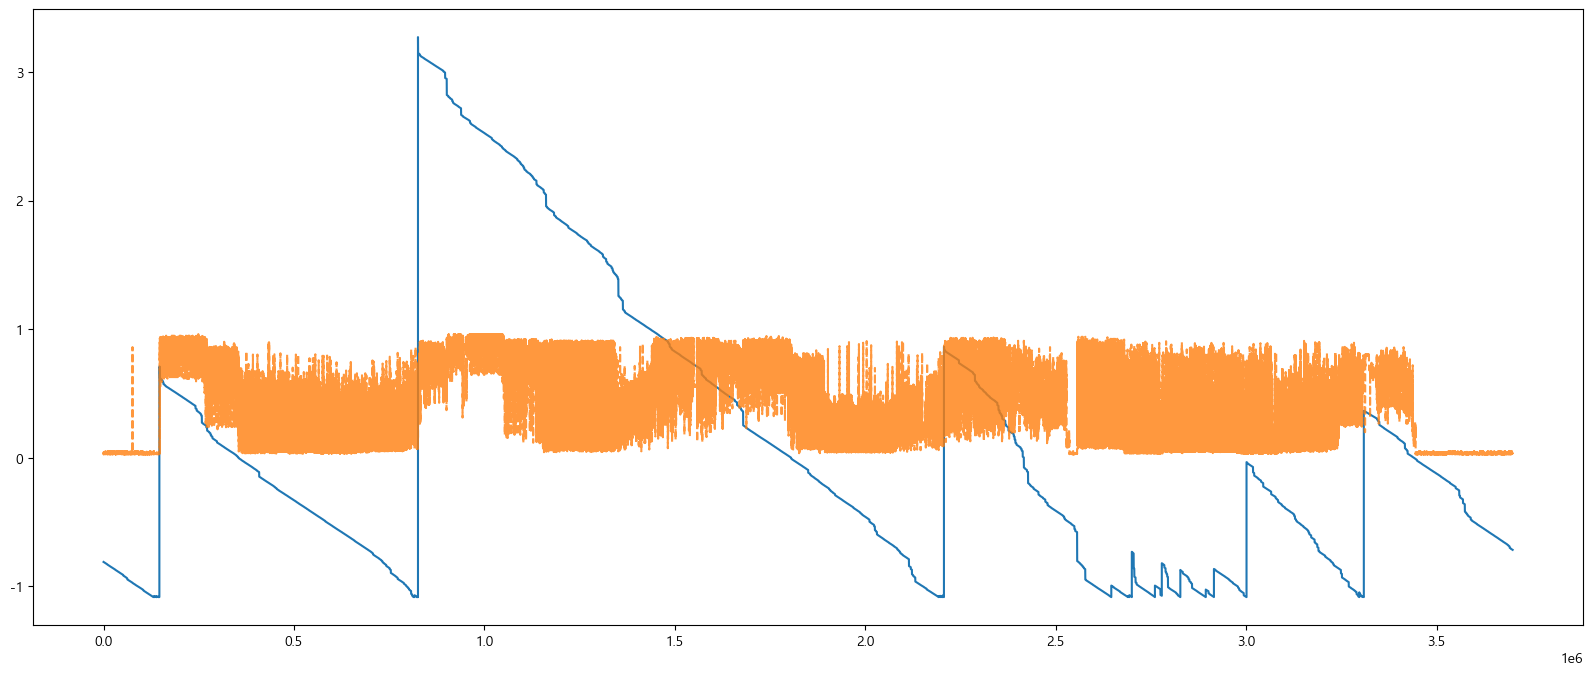

In [281]:
y_pred2 = bst.predict(X_train)

plt.figure(figsize=(20,8))
plt.plot(range(len(y_train)), y_train.reshape(-1))
plt.plot(range(len(y_train)), y_pred2, linestyle='--', alpha=0.8)
plt.show()

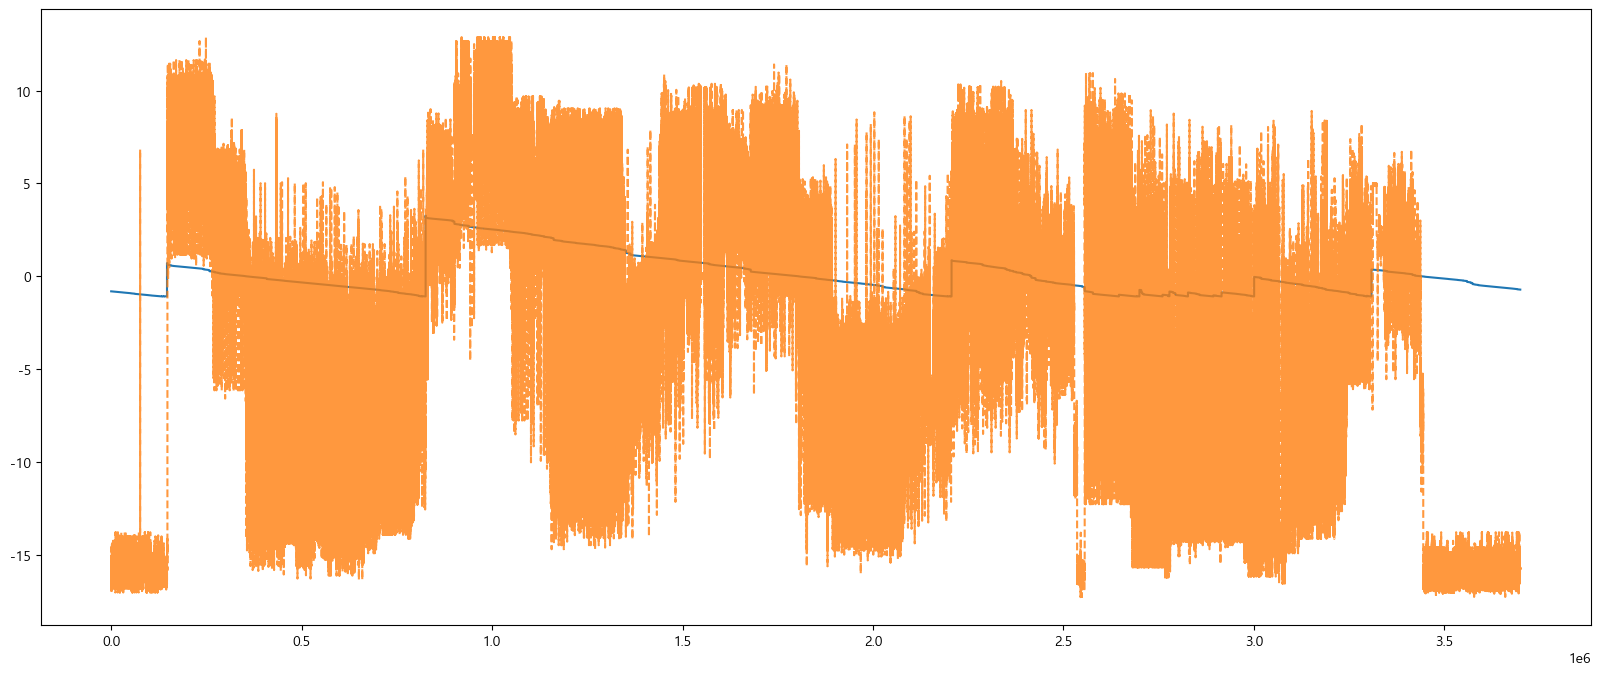

In [299]:
max_val = y_train.max()
min_val = y_train.min()

pred_reverse = []
for val in y_pred2:
    P = -np.log(1 / val - 1)
    pred_reverse.append(min_val + P * (max_val - min_val))
    
plt.figure(figsize=(20,8))
plt.plot(range(len(y_train)), y_train.reshape(-1))
plt.plot(range(len(y_train)), pred_reverse, linestyle='--', alpha=0.8)
plt.show()

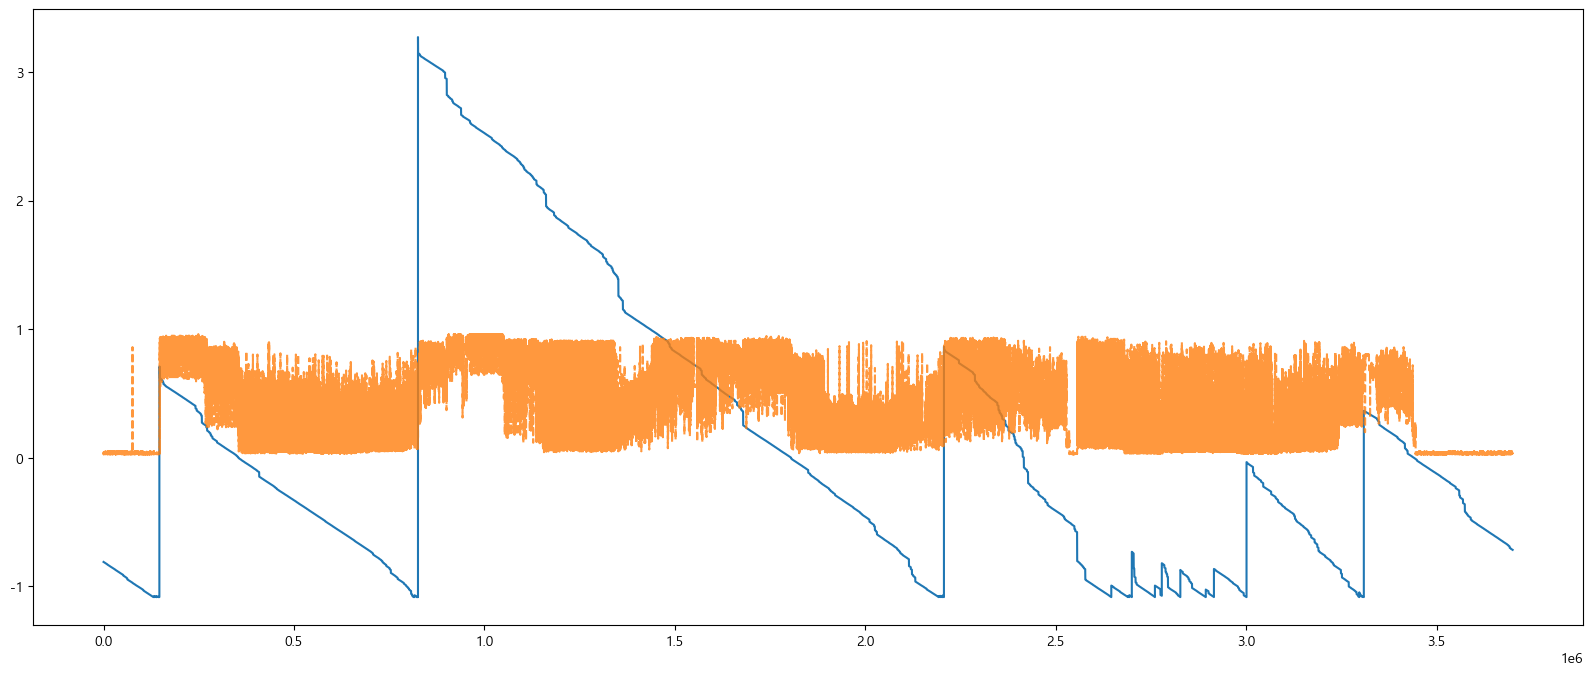

In [298]:
# Leaky ReLU 함수 정의
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

pred_reverse = []
for val in y_pred2:
    pred_reverse.append(leaky_relu(val))
    
plt.figure(figsize=(20,8))
plt.plot(range(len(y_train)), y_train.reshape(-1))
plt.plot(range(len(y_train)), pred_reverse, linestyle='--', alpha=0.8)
plt.show()